# <p style="text-align:center;font-size:70px;background-color:#0ad61b;color:white;font-style:italic;">Python for web</p>

![](http://www.blog.skytopper.com/wp-content/uploads/2015/06/Global-computer-network.jpg)

This bootcamp is all about interacting with **web** using Python programming language!

In this bootcamp, we will learn:

- to work with web APIs
- to download content from web
- web scraping
- sending Emails
- web automation

using simple python scripts!

# 1. Working with web APIs

- **What is API?**<br>
    API is a set of routines, protocols, and tools for building software applications. An API specifies how software components should interact. 
![](https://www.retriever.nl/wp-content/uploads/2016/11/api-321x250.png)
-------------

- **What is web API?**<br>
    Web API is a framework for building HTTP services that can be consumed by a broad range of clients including browsers, mobiles, iphone and tablets.
![](http://dselva.co.in/blog/wp-content/uploads/2017/09/Web-APIs.png)
-----------------
- **Some examples of public web APIs:**
    - [Facebook Graph API](https://developers.facebook.com/docs/graph-api)
    - [Twitter API](https://dev.twitter.com/rest/public)
    - [Google API explorer](https://developers.google.com/apis-explorer/#p/)
--------------

- **What is REST?**<br>
    REST is an architectural style followed by web services, in which, they allow requesting systems to access and manipulate their Web resources using a uniform and predefined set of **stateless operations**.
    
    >In computing, a stateless protocol is a communications protocol in which no information is retained by either sender or receiver. The sender transmits a packet to the receiver and does not expect an acknowledgment of receipt. There is nothing saved that has to be remembered by the next transaction. The server must be able to completely understand the client request without using any server context or server session state. 
    
   Advantages of REST:
   - As the transactions are stateless, we can direct them to any instance of the web service. (As no sessions are involved). Hence, the web service can scale to accommodate load changes.
   - Binding to a service through an API is a matter of controlling how the URL is decoded.

-----------------
- **Types of HTTP requests**
    - GET
    - POST
    - DELETE
    - PUT
    - PATCH, etc.
    
![](http://lotsofthing.com/wp-content/uploads/2017/11/rest-api-1.jpg)

### HTTP  for humans: [requests](http://docs.python-requests.org/en/master/)

<img src="http://docs.python-requests.org/en/master/_static/requests-sidebar.png"  height=200 width=200>


- Requests is one of the most downloaded Python packages of all time, pulling in over 7,000,000 downloads every month.All the cool kids are doing it

- Recreational use of other HTTP libraries may result in dangerous side-effects, including: security vulnerabilities, verbose code, reinventing the wheel, constantly reading documentation, depression, headaches, or even death. Requests is the only Non-GMO HTTP library for Python, safe for human consumption.

- Python HTTP: When in doubt, or when not in doubt, use Requests. Beautiful, simple, Pythonic.

***Everybody loves it!***

#### Installation

```
pip install requests
```

## GET request

### Example 1

http://graph.facebook.com/4/picture?type=large

![](http://graph.facebook.com/4/picture?type=large)

![](http://graph.facebook.com/11/picture?type=large)

In [1]:
import requests

In [7]:
url = "http://graph.facebook.com/{}/picture?type=large"
for i in range(4, 200):
    r = requests.get(url.format(i))
    with open("dps/{}.jpg".format(i), "wb") as file:
        file.write(r.content)

KeyboardInterrupt: 

In [4]:
r = requests.get(url)

In [6]:
with open("dps/marky.jpg", "wb") as file:
    file.write(r.content)

![](https://drlongnecker.com/-/file/90/api-calls-are-easy)

![](http://i.imgur.com/gRvt4lV.png)

### Example 2

[Google maps geocoding API](https://developers.google.com/maps/documentation/geocoding/intro)

In [8]:
url = "https://maps.googleapis.com/maps/api/geocode/json?address=coding+blocks"
r = requests.get(url)
print(r.content)

b'{\n   "error_message" : "You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account",\n   "results" : [],\n   "status" : "REQUEST_DENIED"\n}\n'


## POST request

![](https://www.safaribooksonline.com/library/view/head-first-servlets/9780596516680/httpatomoreillycomsourceoreillyimages1377910.png.jpg)

### Example 1

[Pastebin API](https://pastebin.com/api)

In [9]:
url = "https://pastebin.com/api/api_post.php"
key = "e7d82892722c4597a57091897f2a449f"

In [14]:
data = {
    "api_dev_key": key,
    "api_option": "paste",
    "api_paste_code": '''print("Hello World !")''',
    "api_paste_format": "python"
}

In [15]:
r = requests.post(url, data=data)

In [16]:
r.content

b'https://pastebin.com/pBHQir5e'

### Example 2

https://m.me/mycodebot

[HackeRank code checker API](https://www.hackerrank.com/api/docs)

# 2. Downloading files

![](http://noclone.net/images/file-types-s.png)

Downloading large files in chunks!

In [19]:
url = "https://www.iso.org/iso/annual_report_2009.pdf"
r = requests.get(url)
with open("sample.test", "wb") as file:
    file.write(r.content)

KeyboardInterrupt: 

In [26]:
url = "https://www.iso.org/iso/annual_report_2009.pdf"
r = requests.get(url, stream = True)
print(r.headers['Content-Length'])

10762150


In [40]:
from tqdm import tqdm
url = "https://www.iso.org/iso/annual_report_2009.pdf"
r = requests.get(url, stream = True)
chunk_size = 256
total = int(r.headers['Content-Length']) // 256
with open("sample.pdf", "wb") as file:
    for chunk in tqdm(r.iter_content(chunk_size), total=total):
        file.write(chunk)



  0%|          | 0/42039 [00:00<?, ?it/s]

  0%|          | 46/42039 [00:00<02:34, 272.25it/s]

  0%|          | 125/42039 [00:00<02:16, 308.04it/s]

  0%|          | 204/42039 [00:00<02:02, 342.50it/s]

  1%|          | 232/42039 [00:01<06:38, 104.99it/s]

  1%|          | 253/42039 [00:01<06:23, 108.88it/s]

  1%|          | 273/42039 [00:01<06:17, 110.50it/s]

  1%|          | 300/42039 [00:02<08:35, 80.98it/s] 

  1%|          | 337/42039 [00:02<06:59, 99.51it/s]

  1%|          | 360/42039 [00:02<06:26, 107.75it/s]

  1%|          | 377/42039 [00:02<06:39, 104.30it/s]

  1%|          | 417/42039 [00:02<05:33, 124.94it/s]

  1%|          | 445/42039 [00:02<05:10, 133.88it/s]

  1%|          | 473/42039 [00:03<08:55, 77.68it/s] 

  1%|          | 524/42039 [00:04<07:38, 90.47it/s]

  1%|▏         | 575/42039 [00:04<06:04, 113.82it/s]

  1%|▏         | 626/42039 [00:04<04:57, 139.41it/s]

  2%|▏         | 677/42039 [00:04<04:50, 142.48it/s]

  2%|▏         | 728/42039 [00:04<04:06,

 29%|██▉       | 12328/42039 [00:29<01:32, 322.65it/s]

 29%|██▉       | 12396/42039 [00:29<01:28, 333.15it/s]

 30%|██▉       | 12447/42039 [00:30<03:15, 151.08it/s]

 30%|██▉       | 12498/42039 [00:30<02:47, 176.03it/s]

 30%|██▉       | 12549/42039 [00:30<02:29, 197.74it/s]

 30%|███       | 12650/42039 [00:30<02:00, 244.22it/s]

 30%|███       | 12701/42039 [00:30<01:54, 257.30it/s]

 30%|███       | 12809/42039 [00:31<01:33, 313.20it/s]

 31%|███       | 12852/42039 [00:31<04:07, 118.07it/s]

 31%|███       | 12884/42039 [00:32<03:41, 131.89it/s]

 31%|███       | 12922/42039 [00:32<03:18, 147.05it/s]

 31%|███       | 12973/42039 [00:32<03:42, 130.37it/s]

 31%|███       | 13024/42039 [00:33<04:51, 99.71it/s] 

 31%|███       | 13075/42039 [00:33<03:53, 124.00it/s]

 31%|███       | 13125/42039 [00:33<03:13, 149.20it/s]

 31%|███▏      | 13176/42039 [00:34<03:14, 148.65it/s]

 31%|███▏      | 13227/42039 [00:34<02:44, 174.72it/s]

 32%|███▏      | 13251/42039 [00:35<06:06, 78.60

 58%|█████▊    | 24523/42039 [01:05<00:34, 510.01it/s]

 59%|█████▊    | 24625/42039 [01:05<00:32, 534.99it/s]

 59%|█████▊    | 24682/42039 [01:06<01:10, 245.85it/s]

 59%|█████▉    | 24725/42039 [01:06<01:33, 185.55it/s]

 59%|█████▉    | 24794/42039 [01:07<01:20, 214.08it/s]

 59%|█████▉    | 24845/42039 [01:07<01:13, 233.25it/s]

 59%|█████▉    | 24896/42039 [01:07<01:06, 256.54it/s]

 59%|█████▉    | 24998/42039 [01:07<00:56, 301.40it/s]

 60%|█████▉    | 25049/42039 [01:07<00:56, 299.55it/s]

 60%|█████▉    | 25085/42039 [01:08<01:57, 144.47it/s]

 60%|█████▉    | 25117/42039 [01:08<01:50, 153.59it/s]

 60%|█████▉    | 25168/42039 [01:08<01:34, 179.42it/s]

 60%|█████▉    | 25219/42039 [01:08<01:24, 199.57it/s]

 60%|██████    | 25269/42039 [01:09<01:16, 219.75it/s]

 60%|██████    | 25371/42039 [01:09<01:02, 268.65it/s]

 60%|██████    | 25422/42039 [01:09<00:59, 279.17it/s]

 61%|██████    | 25490/42039 [01:09<00:53, 306.50it/s]

 61%|██████    | 25592/42039 [01:09<00:46, 355.4

 82%|████████▏ | 34681/42039 [01:38<00:40, 181.12it/s]

 83%|████████▎ | 34732/42039 [01:38<00:35, 204.23it/s]

 83%|████████▎ | 34834/42039 [01:38<00:28, 252.10it/s]

 83%|████████▎ | 34885/42039 [01:39<00:49, 145.54it/s]

 83%|████████▎ | 34936/42039 [01:39<00:48, 145.08it/s]

 83%|████████▎ | 34998/42039 [01:39<00:40, 175.93it/s]

 83%|████████▎ | 35049/42039 [01:39<00:34, 200.07it/s]

 83%|████████▎ | 35100/42039 [01:39<00:31, 220.21it/s]

 84%|████████▎ | 35151/42039 [01:40<00:28, 238.97it/s]

 84%|████████▎ | 35202/42039 [01:40<00:27, 252.83it/s]

 84%|████████▍ | 35304/42039 [01:40<00:22, 303.76it/s]

 84%|████████▍ | 35355/42039 [01:40<00:22, 297.95it/s]

 84%|████████▍ | 35417/42039 [01:40<00:21, 314.39it/s]

 84%|████████▍ | 35519/42039 [01:41<00:28, 232.07it/s]

 85%|████████▍ | 35569/42039 [01:41<00:33, 194.74it/s]

 85%|████████▍ | 35620/42039 [01:42<00:29, 217.02it/s]

 85%|████████▍ | 35722/42039 [01:42<00:23, 265.30it/s]

 85%|████████▌ | 35773/42039 [01:42<00:22, 274.8

In [27]:
from tqdm import tqdm

In [34]:
def fact(n):
    res = 1
    for i in range(n+1): res*=i
    return res

In [36]:
for i in tqdm(range(100000)):
    fact(i)

 89%|████████▊ | 88541/100000 [03:39<01:26, 133.00it/s] 

KeyboardInterrupt: 

# 3. Web scraping

![](https://cdn-images-1.medium.com/max/1600/0*yxxFwUEPQU3lAz4W.png)

![](https://image.slidesharecdn.com/scrapingtotherescue-160713133749/95/getting-started-with-web-scraping-in-python-9-638.jpg?cb=1468417631)

## [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

>Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

### Installation

```
pip install bs4
```

**Bonus:**
```
pip install html5lib
```

https://www.values.com/inspirational-quotes

## 4. Sending Email

![](https://camo.githubusercontent.com/ee342ab0ad69e2615876732e43e301980315359b/68747470733a2f2f6265636f6d65746865736f6c7574696f6e2e636f6d2f696d616765732f65617379626c6f675f696d616765732f3431342f736d74702d6c6f676f2e6a7067)


**An Internet standard for electronic mail (email) transmission.**

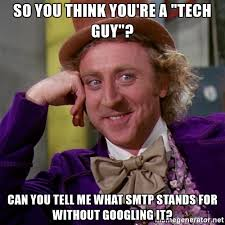

### smtplib

The smtplib module defines an SMTP client session object that can be used to send mail to any Internet machine with an SMTP or ESMTP listener.

In [ ]:
import smtplib

## For sending proper Email

**Multipurpose Internet Mail Extensions (MIME)** is an Internet standard that extends the format of email to support:
- Text in character sets other than ASCII
- Non-text attachments: audio, video, images, application programs etc.
- Message bodies with multiple parts
- Header information in non-ASCII character sets

In [ ]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# 5. Web automation


**Task:** Automatically submit the code for a problem on [codechef](https://www.codechef.com/).

### [Selenium](http://selenium-python.readthedocs.io/) : Web automation and testing

![](https://udemy-images.udemy.com/course/750x422/482754_7146_4.jpg)


#### Installation

```
pip install selenium
```

#### To start a browser session
```python
from selenium import webdriver
browser = webdriver.Firefox()
```

#### To open a webpage
```python
browser.get('https://www.codechef.com')
```

#### To select an element by its id
```python
browser.find_element_by_id(<id>)
```

#### Input value in element
```python
element.send_keys()
```

#### Click on an element
```python
element.click()
```